In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

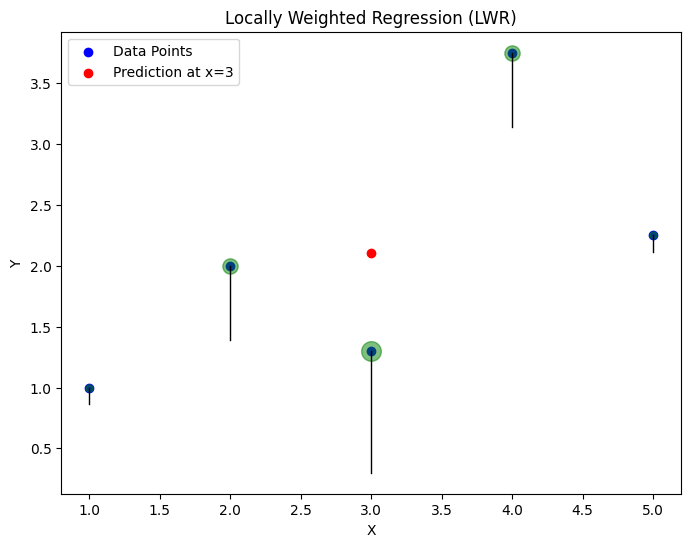

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian Kernel
def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))

# Locally Weighted Regression
def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]
    x_query_b = np.array([1, x_query])
    W = np.diag(gaussian_kernel(X, x_query, tau))
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    return x_query_b @ theta

# Dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 1.3, 3.75, 2.25])
x_query = 3
tau = 1.0
y_pred = locally_weighted_regression(X, y, x_query, tau)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(x_query, y_pred, color='red', label=f'Prediction at x={x_query}')
weights = gaussian_kernel(X, x_query, tau)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y[i] - weights[i]], 'k-', lw=1)
    plt.scatter(X[i], y[i], s=weights[i]*200, color='green', alpha=0.5)
plt.title("Locally Weighted Regression (LWR)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


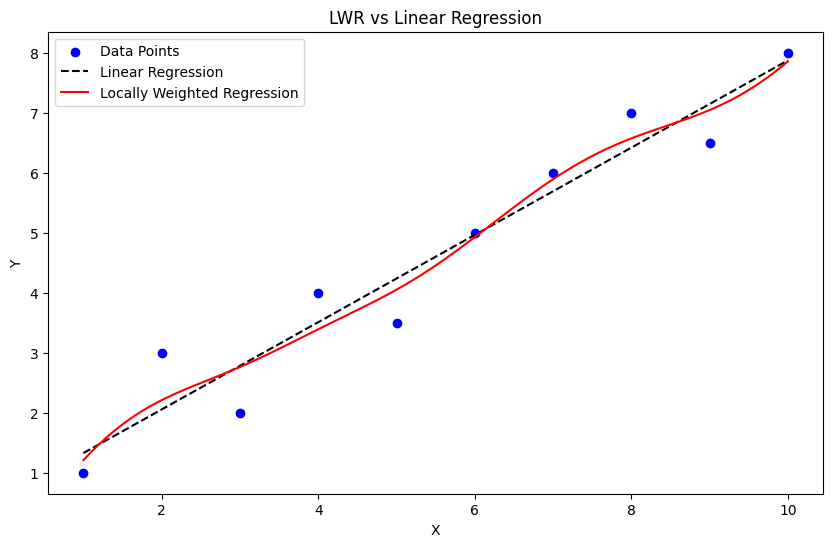

In [19]:
from sklearn.linear_model import LinearRegression

# New dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 8])
X_query = np.linspace(1, 10, 100)
tau = 1.0

# LWR predictions
y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])

# Linear Regression
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
y_lin = lr.predict(X_query.reshape(-1, 1))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_query, y_lin, 'k--', label='Linear Regression')
plt.plot(X_query, y_lwr, 'r-', label='Locally Weighted Regression')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("LWR vs Linear Regression")
plt.legend()
plt.show()


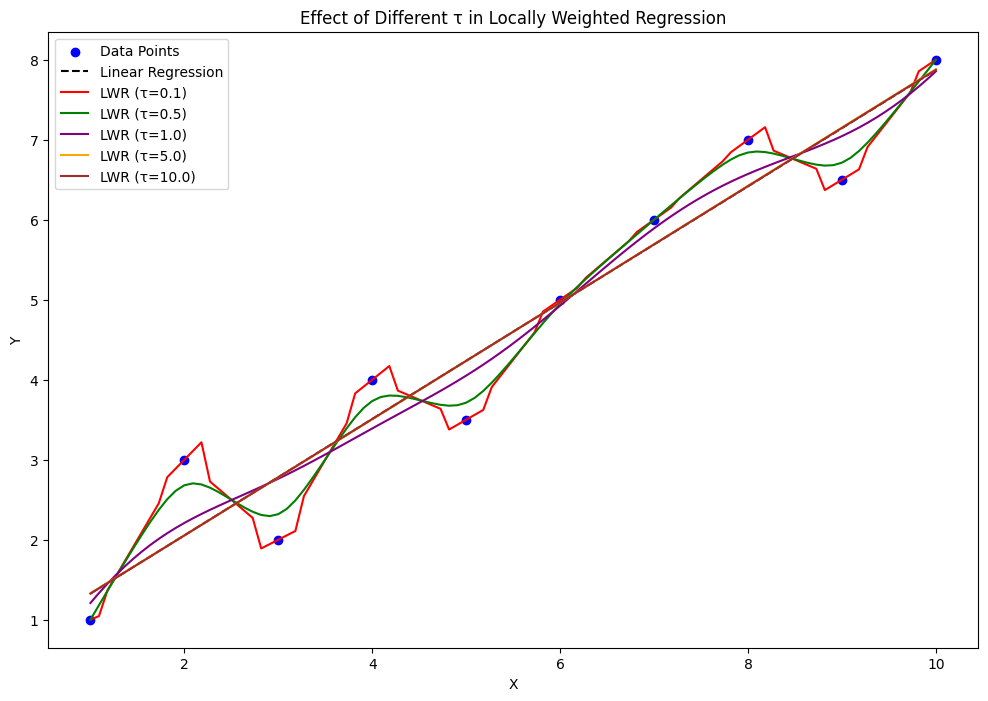

In [20]:
tau_values = [0.1, 0.5, 1.0, 5.0, 10.0]
colors = ['red', 'green', 'purple', 'orange', 'brown']

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_query, y_lin, 'k--', label='Linear Regression')

for tau, color in zip(tau_values, colors):
    y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])
    plt.plot(X_query, y_lwr, color=color, label=f'LWR (τ={tau})')

plt.title("Effect of Different τ in Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
